In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# =============================
# 1. Data Cleaning
# =============================

# Load the Penguins dataset from Seaborn
df = sns.load_dataset('penguins')

# Inspect dataset structure
print("----- Dataset Head -----")
print(df.head())
print("\n----- Dataset Info -----")
print(df.info())
print("\n----- Summary Statistics -----")
print(df.describe(include='all'))

# Check for missing values in each column
print("\n----- Missing Values -----")
print(df.isnull().sum())

----- Dataset Head -----
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_

In [3]:
# Handling missing values:
# For numerical columns, fill missing values with the median.
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [5]:
# For categorical columns, fill missing with the mode.
cat_cols = ['species', 'island', 'sex']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Verify that missing values are handled
print("\n----- Missing Values After Imputation -----")
print(df.isnull().sum())


----- Missing Values After Imputation -----
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [6]:
# Identify and remove duplicate records
num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate records:", num_duplicates)
df.drop_duplicates(inplace=True)


Number of duplicate records: 0


In [7]:
# Outlier Detection and Treatment using the IQR method
def remove_outliers(dataframe, column):
    """
    Remove outliers from a dataframe column using the IQR method.
    """
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

In [8]:
# Apply outlier removal for numerical columns 'bill_length_mm' and 'body_mass_g'
df = remove_outliers(df, 'bill_length_mm')
df = remove_outliers(df, 'body_mass_g')

# Standardize categorical values:
# Convert 'sex' to lowercase and 'island' to uppercase for consistency.
df['sex'] = df['sex'].str.lower()
df['island'] = df['island'].str.upper()

In [9]:
# =============================
# 2. Exploratory Data Analysis (EDA)
# =============================

# ----- Univariate Analysis -----

# Summary statistics for numerical variables
print("\n----- Numerical Variables Summary -----")
print(df.describe())

# Frequency distribution for a categorical variable (e.g., 'species')
print("\n----- Frequency Distribution for 'species' -----")
print(df['species'].value_counts())


----- Numerical Variables Summary -----
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.925000      17.152035         200.892442  4200.872093
std          5.443792       1.969060          14.023826   799.696532
min         32.100000      13.100000         172.000000  2700.000000
25%         39.275000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

----- Frequency Distribution for 'species' -----
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


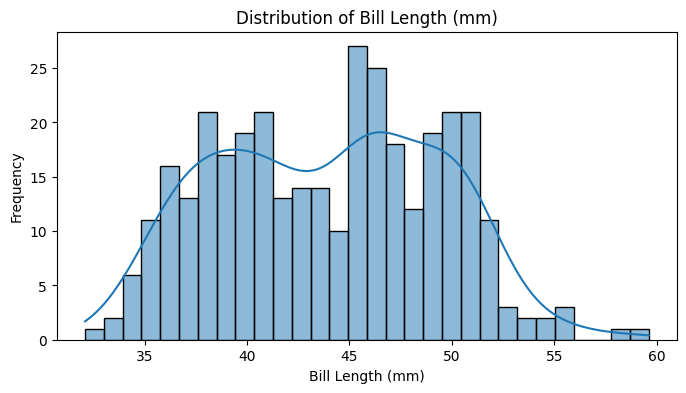

In [10]:

# Plot histogram for 'bill_length_mm'
plt.figure(figsize=(8, 4))
sns.histplot(df['bill_length_mm'], bins=30, kde=True)
plt.title("Distribution of Bill Length (mm)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Frequency")
plt.show()

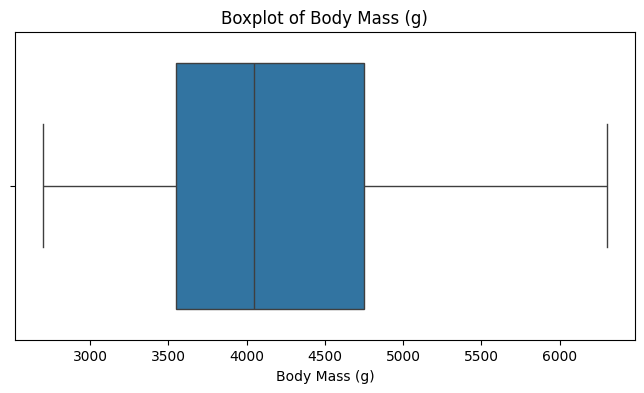

In [11]:
# Plot boxplot for 'body_mass_g' to visualize its distribution and potential outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['body_mass_g'])
plt.title("Boxplot of Body Mass (g)")
plt.xlabel("Body Mass (g)")
plt.show()

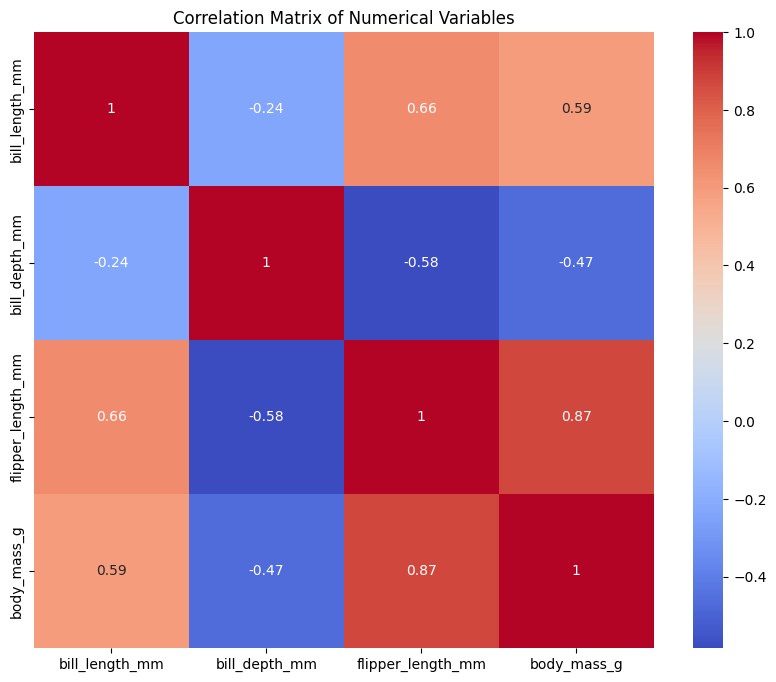

In [12]:
# ----- Bivariate Analysis -----

# Correlation matrix for numerical variables
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

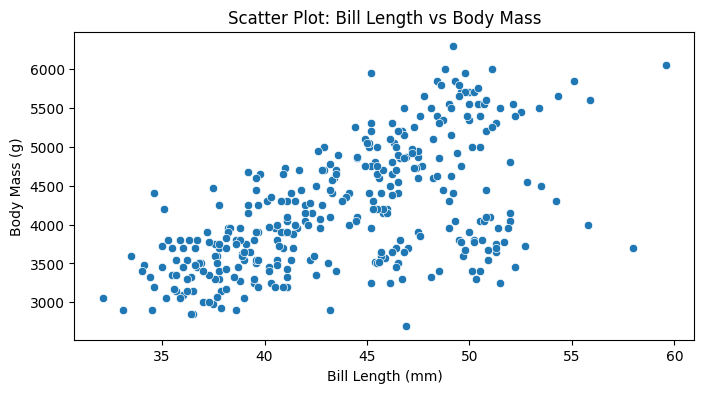

In [13]:

# Scatter plot to explore the relationship between 'bill_length_mm' and 'body_mass_g'
plt.figure(figsize=(8, 4))
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=df)
plt.title("Scatter Plot: Bill Length vs Body Mass")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

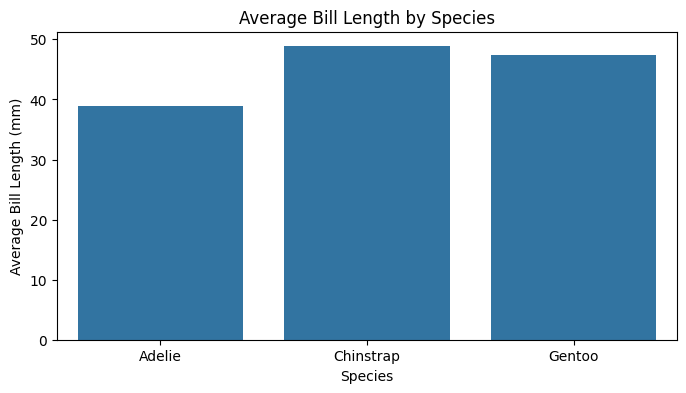

In [14]:
# Bar plot comparing the average bill length by species
plt.figure(figsize=(8, 4))
sns.barplot(x='species', y='bill_length_mm', data=df, ci=None)
plt.title("Average Bill Length by Species")
plt.xlabel("Species")
plt.ylabel("Average Bill Length (mm)")
plt.show()

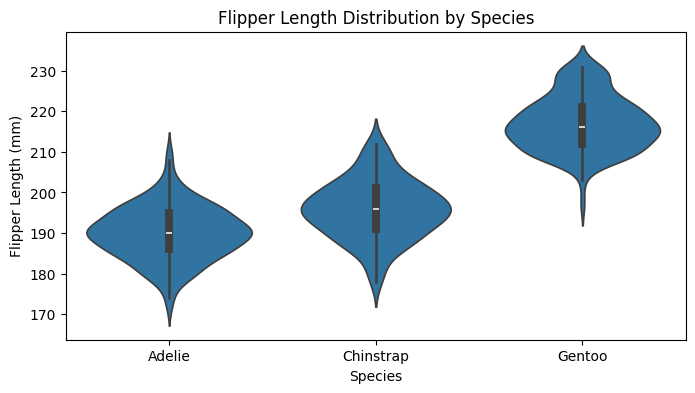

In [15]:

# Violin plot to compare flipper length distributions across species
plt.figure(figsize=(8, 4))
sns.violinplot(x='species', y='flipper_length_mm', data=df)
plt.title("Flipper Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

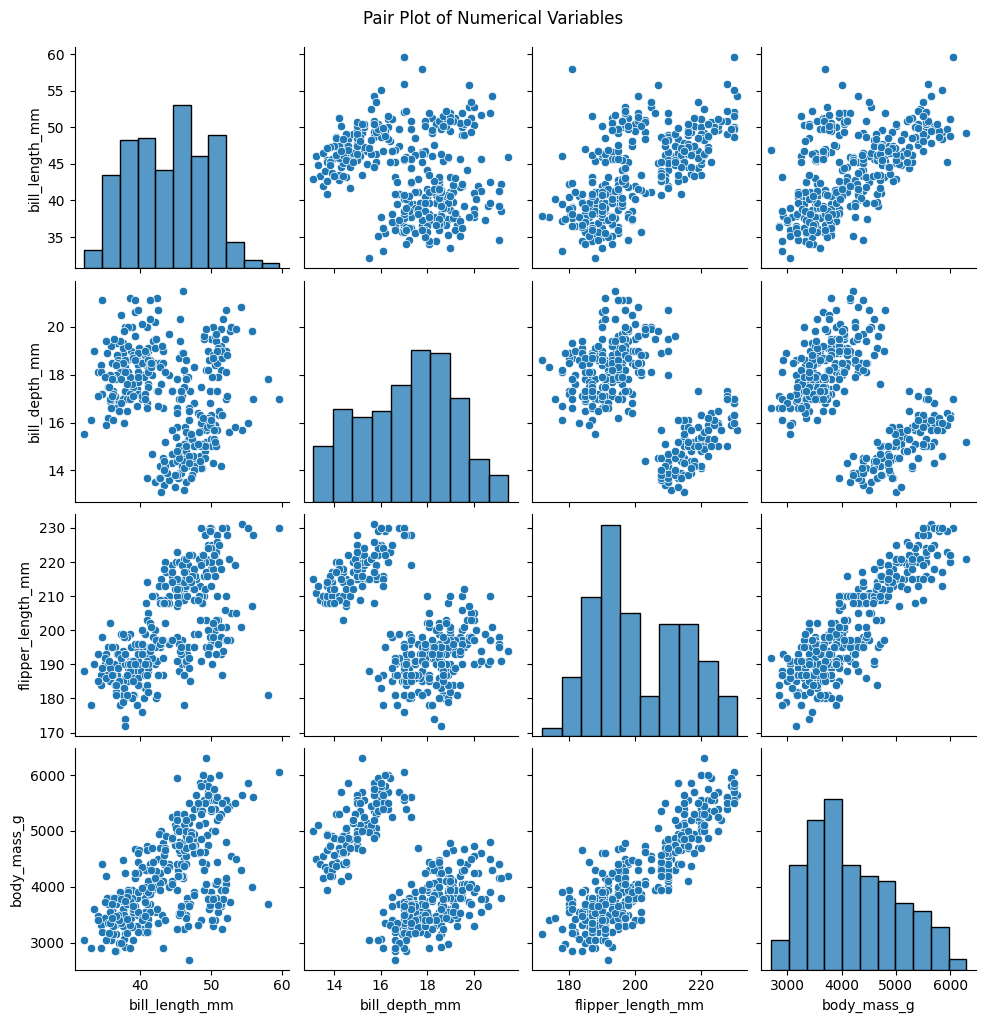

In [16]:
# ----- Multivariate Analysis -----

# Pair plot for numerical variables to see pairwise relationships
sns.pairplot(df[num_cols])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

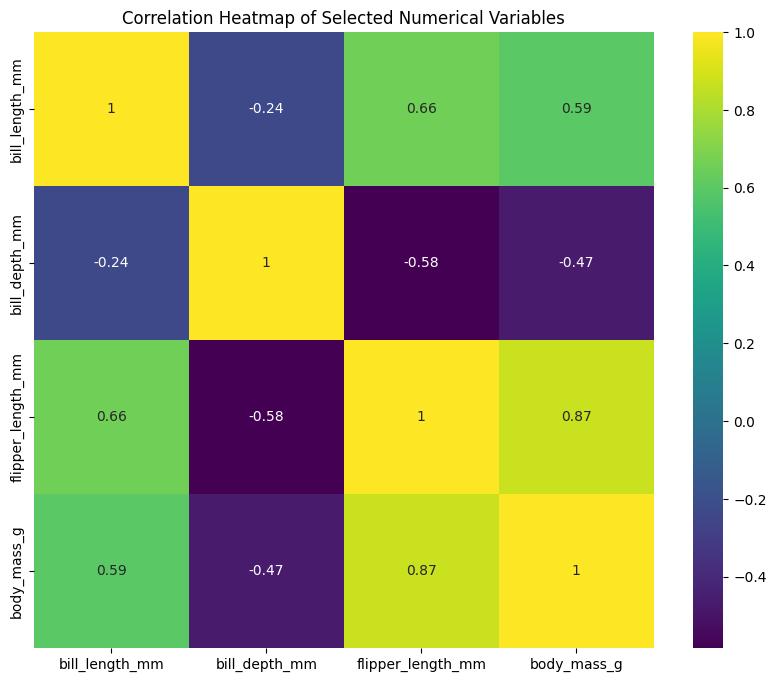

In [17]:
# Heatmap for correlations among a subset of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap of Selected Numerical Variables")
plt.show()

In [18]:
# Grouped comparison: average body mass by sex and species
grouped = df.groupby(['sex', 'species'])['body_mass_g'].mean().reset_index()
print("\n----- Average Body Mass by Sex and Species -----")
print(grouped)


----- Average Body Mass by Sex and Species -----
      sex    species  body_mass_g
0  female     Adelie  3368.835616
1  female  Chinstrap  3527.205882
2  female     Gentoo  4679.741379
3    male     Adelie  4011.708861
4    male  Chinstrap  3938.970588
5    male     Gentoo  5408.712121


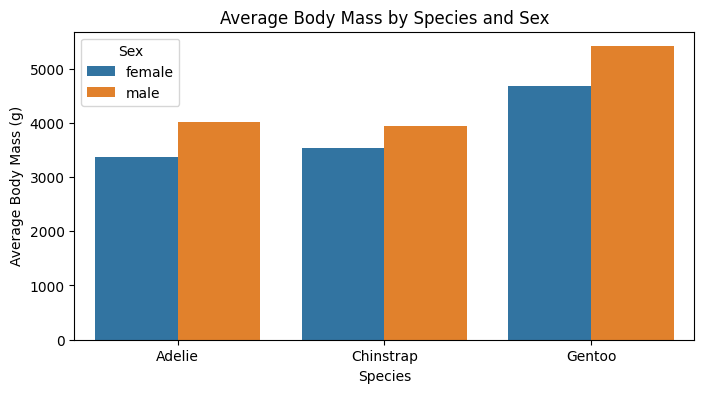

In [19]:
# Bar plot for grouped comparison
plt.figure(figsize=(8, 4))
sns.barplot(x='species', y='body_mass_g', hue='sex', data=grouped)
plt.title("Average Body Mass by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Average Body Mass (g)")
plt.legend(title="Sex")
plt.show()

In [20]:
# =============================
# Save Cleaned Dataset (Optional)
# =============================
df.to_csv("penguins_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'penguins_cleaned.csv'")


Cleaned dataset saved as 'penguins_cleaned.csv'
